<a href="https://colab.research.google.com/github/DefCon-init/machinelearning/blob/master/BreastCancerDiagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **ABSTRACT**

Doing an feature selection is an imporant task of a machine learning model. With proper feature selection we can increase the accuracy of the model. The aim of the notebook is to find the factors affecting the diagnosis of breast cancer and creating a model to predict its accurracy.

2. **DATA CLEANING AND FEATURE SELECTION**

In any given dataset, the selection of the features that impacts the target variable is one of the most important and primary steps of a model desgining. This process is known as data cleaning and feature selection.

If a data consists of many irrelevant features which has either no or less contribution to our target variable the accuracy and the performance of the model will be affected.

Listed are some of the benefits of performing feature selection before modeling your data:

*   Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
*   Improves Accuracy: Less misleading data means modeling accuracy improves.
*   Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In this notebook we will focus on feature visualization and selection.

**2.1 DOWNLOADING KAGGLE AND DATASET**

In [61]:
!pip install kaggle

In [62]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [63]:
import json

token = {"username":"gujjubola","key":"1f50d80c465f61f82ebb200cf0973b39"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [64]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [65]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json && chmod 600 /root/.kaggle/kaggle.json

In [66]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [67]:
!kaggle datasets list -s uciml/breast-cancer-wisconsin-data

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  -------------------------------------------------  ----  -------------------  -------------  
uciml/breast-cancer-wisconsin-data                     Breast Cancer Wisconsin (Diagnostic) Data Set      49KB  2016-09-25 10:49:04         166950  
irmawatiar/wwwkagglecomucimlbreastcancerwisconsindata  www.kaggle.com/uciml/breast-cancer-wisconsin-data  49KB  2021-04-23 14:23:47              2  


In [68]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data -p /content && cd content/

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/bash: line 0: cd: content/: No such file or directory


In [69]:
cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [70]:
!unzip \*.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


3.  **IMPORTING NECESSARY LIBRARIES**

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

4. **DATA LOADING AND PREPROCESSING**

In [71]:
from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

data = pd.read_csv('data.csv')

data.head()

breast-cancer-wisconsin-data.zip
data.csv
sample_data



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**4.1 FINDING MISSING VALUES**

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As we can see that there are no null values present in our dataset.

**4.2 TREATING NAN AND ID FEATURES**

In [73]:
print('Length of id is ',len(data.id))

print('Number of NAN values in Unnamed:32 is ', data['Unnamed: 32'].isna().sum())

Length of id is  569
Number of NAN values in Unnamed:32 is  569


By analyzing the above data we can say that,

1. There is an id that cannot be used for classificaiton
2. Diagnosis is our class label
3. Unnamed: 32 feature includes NaN so we do not need it.

Therefore, we will drop these unnecessary features.

In [74]:
# y includes our labels and x includes our features
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**4.3 CLASS DISTRIBUTION**

Number of Benign:  357
Number of Malignant :  212


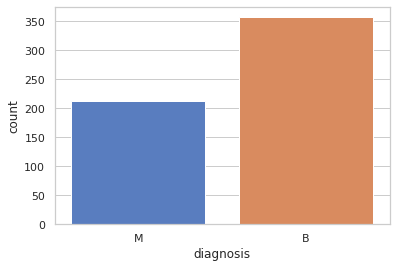

In [75]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

From the above plot it is evident that,

* Class distribution: 357 benign, 212 malignant

Though we don't know the features meaning and it's relation to the diagnosis. Let's get a general idea of the dataset by getting a bit more idea on features.

In [76]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Here,
*   area_mean feature's max value is 2500
*   smoothness_mean features' max 0
*   area_worst also has a max value of 4254

Therefore, we can do standardization before visualization and feature selection as we can see that the differences between values is very high to observe on a plot.

5. **STANDARDIZATION**

In [77]:
data = x
data_n_2 = (data - data.mean()) / (data.std())  
data_n_2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


6. **VISUALIZATION**

In order to visualizate data we are going to divide the plot of features in 3 group and each group includes 10 features to observe better.

**6.1 BOX PLOT**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

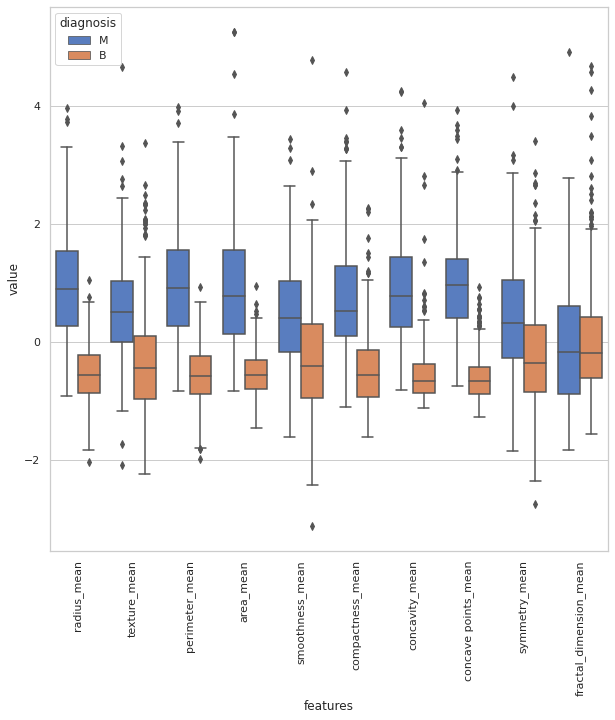

In [79]:
# First ten features

data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In the above plot it is evitable that 

* The distribution of **radius_mean**, **perimeter_mean** and **area_mean** looks correlated. In addition to that distribution of **concavity_mean**, **concave points_mean** and **area_mean** looks correlated

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

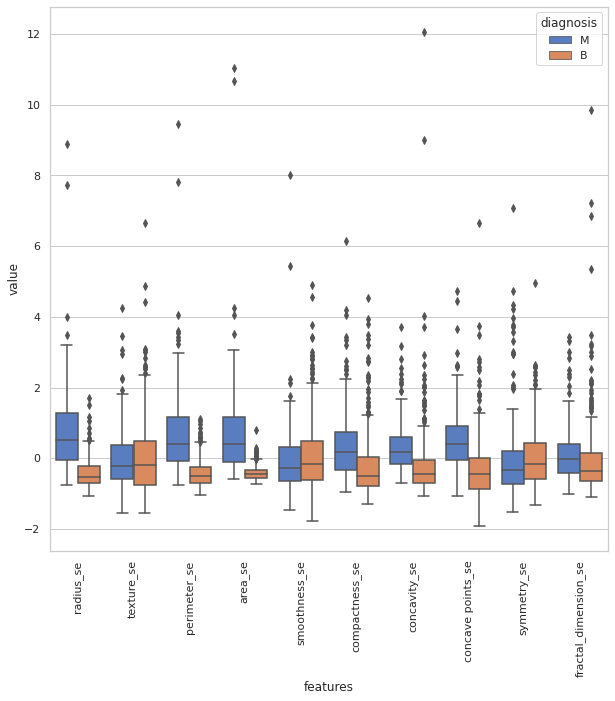

In [85]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In the above plot it is evitable that 

*  The distribution of **compactness_se**, **concave points_se** and **area_mean** looks correlated. Also for **radius_se** and **perimeter_se**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

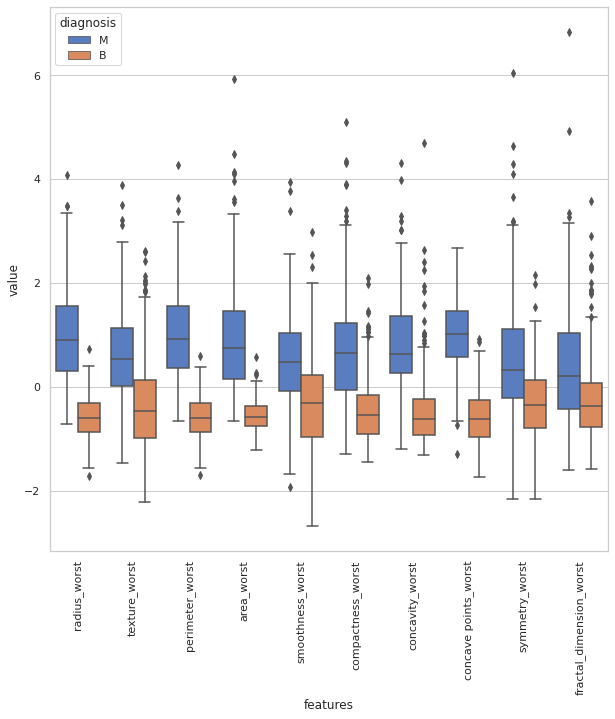

In [86]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Over here,
* **radius_worst**, **perimeter_worst** and **area_worst** seems correlated.

Let's see the distribution with the help of Swarm plot


**6.2 SWARM PLOT**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

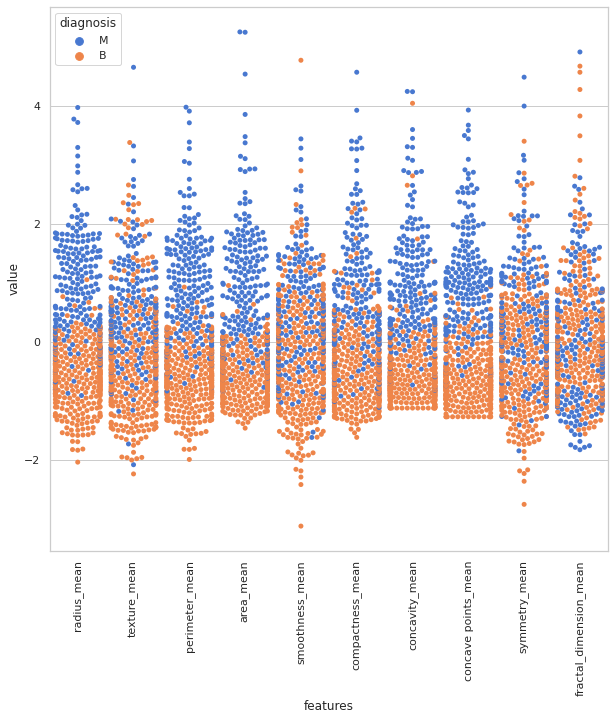

In [91]:
sns.set(style="whitegrid", palette="muted")
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

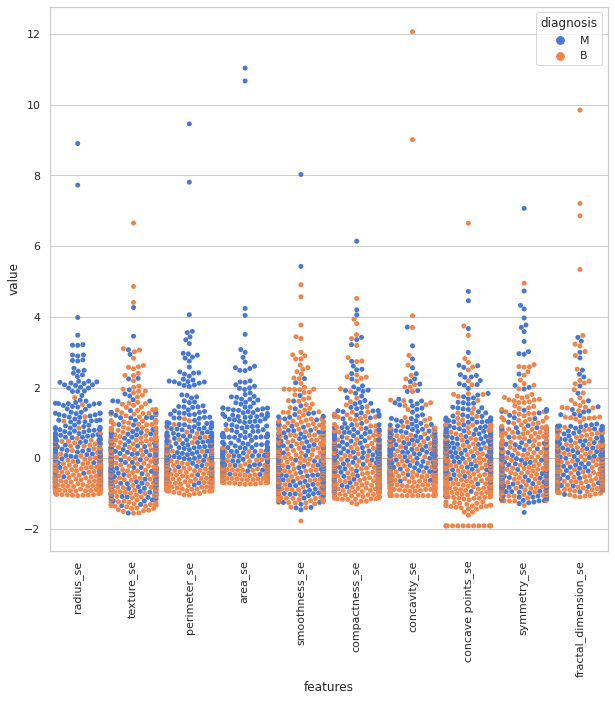

In [92]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  14.759015798568726  s


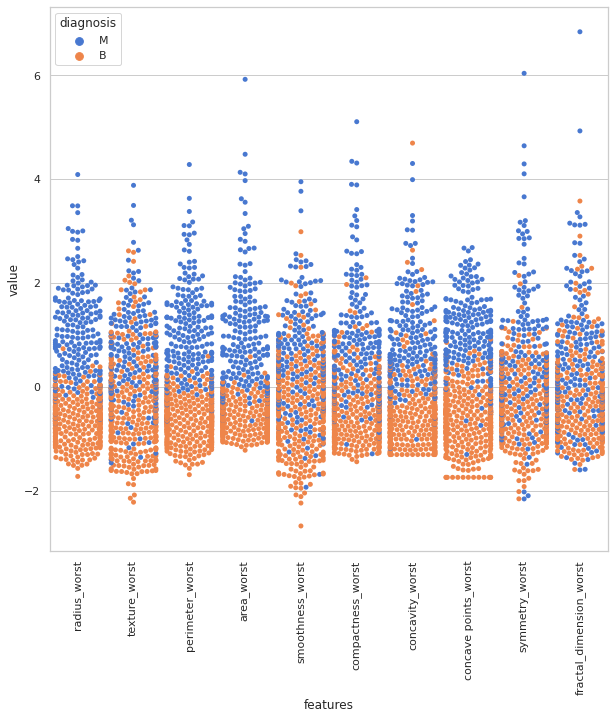

In [93]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

Over here we can see variance more clear. In terms of classification, 
* **area_worst**, **radius_worst**, **concativity_worst**, **concave_point_worst**, **texture_mean**, **radius_mean**, **perimeter_mean**, **area_mean**, **compactness_mean**, **concave_point_mean**, **symmetry_mean**, **area_se**, **radius_se**, **perimeter_se**, **compactness_se**, **concavity_se**, **concave point_se** in the plot looks like malignant and benign are seprated not totaly but mostly.

* Hovewer, features like **fractal_dimension_se**, **symmetry_se**, **smoothness_se**, **fractal_dimension_worst**, **symmetry_worst**, **smoothness_worst**, **texture_worst** looks like malignant and benign are mixed so it is hard to classify while using this feature

Let's check all the coorelated variables from the dataset and with the help of this conclusion we can remove all the correlated variables

**6.3 HEAT MAP**

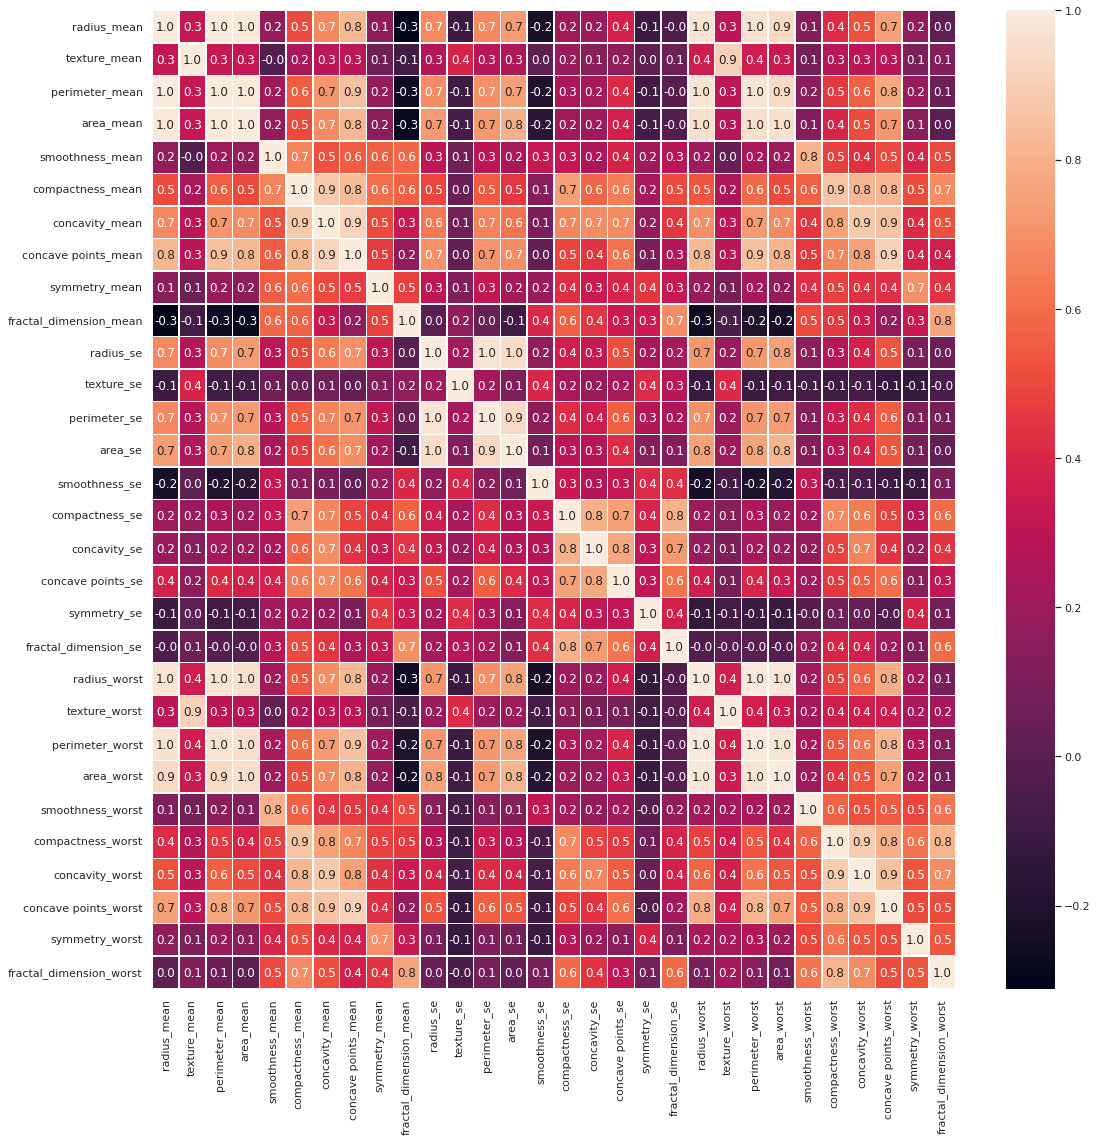

In [94]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

As it can be seen in map heat figure

* **radius_mean, perimeter_mean and area_mean** are correlated with each other so we will use only **area_mean**. Through swarm plot we can safetly assume that **area_mean** have more distinguished data.

* **Compactness_mean**, **concavity_mean** and **concave points_mean** are correlated with each other. Hence, we will only choose **concavity_mean**.

* Apart from these, **radius_se**, **perimeter_se** and **area_se** are correlated and I only use **area_se**.

* **radius_worst**, **perimeter_worst** and **area_worst** are correlated so we will use **area_worst**.

* **Compactness_worst**, **concavity_worst** and **concave points_worst** so I use **concavity_worst**.

* **Compactness_se**, **concavity_se** and **concave points_se** so I use **concavity_se**.

* **texture_mean** and **texture_worst** are correlated and I use **texture_mean**.

* **area_worst** and **area_mean** are correlated, I use **area_mean**.


7. **FEATURE SELECTION WITH RANDOM FOREST CLASSIFIER**

We will remove all the coorelated features and the one's that are not usefull for our classification model

In [95]:
drop_list1 = ['fractal_dimension_se', 'symmetry_se', 'smoothness_se', 'fractal_dimension_worst', 'symmetry_worst', 'smoothness_worst', 'texture_worst', 'perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,concavity_se,concavity_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.05373,0.7119
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.01860,0.2416
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.03832,0.4504
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.05661,0.6869
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.05688,0.4000


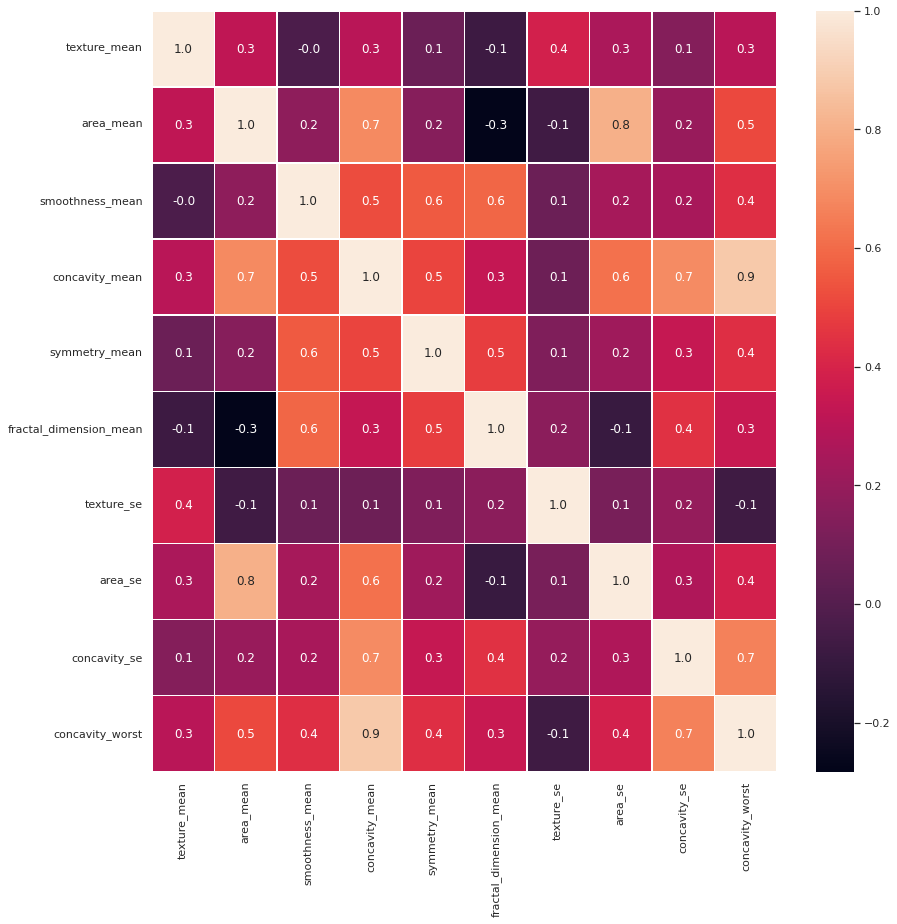

In [96]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In the above heatmap, we infer that all the correlated and null features are removed from the data. With the help of this feature we can check our accurracy and see if the feature selection is done in a correct manner.

**7.2 RANDOM FOREST CLASSIFIER**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

**7.3 TRAIN AND TEST SPLIT**

In [97]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 10) (171, 10) (398,) (171,)


As we can see the shape of the data. We had 10 independent variables without any null values. Thus, train and test consists of same data. 

Accuracy is:  0.9532163742690059


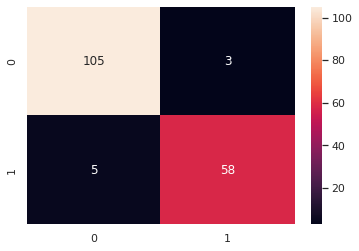

In [99]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction.

**7.4 RECURSIVE FEATURE ELIMINATION (RFE)**


<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html>

Basically, it uses one of the classification methods, assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

In [100]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [101]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_se',
       'concavity_worst'],
      dtype='object')


8. **CONCLUSION**


Feature selection is done after analyzing the data. Firstly, all the null values were dropped as that can affect our prediction. Secondly, all the correlated feature were removed to reduce overfitting and training time execution.

Default data includes 33 features which was brought down to 10 features which led to increase in accuracy.

With the help of this feature we were able to get an accuracy of 95%


**REFRENCE**


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://seaborn.pydata.org/api.html

https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

Copyright 2021 Shubhang S Shah

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**QUESTIONS**

* Which independent variables are useful to predict a target (dependent variable)?
    * From the above mentioned plots we removed all the correlated and non-independent features and created a x_1 dataframe which consists of independent variables that are necessary to predict dependent variable. Those features are 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'concavity_se', 'concavity_worst'
       

* Which independent variables have missing data? How much? 
    * None of our independent variable have any missing data. These can be proved with the help of checking the info of x_1 dataframe


* Do the training and test sets have the same data?
    * No. The training and test dataset is divided in the ratio of 70% and 30%.


* In the predictor variables independent of all the other predictor variables?
    * Yes. After analyzing the distribution of the features, we infered that there were many correlated features. After implemention of heatmap we were able to confirm our hypothesis and then remove all these correlated features from the data set.
    

* Which predictor variables are the most important?
    * 'area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'
       

* Do the ranges of the predictor variables make sense?
    * After doing standardiztion we can see in the data that the range of our predictor variable is distributed in such a way that standard deviation of that dataset was in the range of 0 to 1.
    

* What are the distributions of the predictor variables?
    * As we can see in the swarm plot that the distribution of the predictor variables have data distributed in such a way that the diagnosis can be done. Also, with the help of confusion matrix we can see that we were able to successfully predict the diagnosis type with the help of our variables  